# 1. Import Dataset and Pakcages

In [6]:
# import libaries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# data pre-processing libraries
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.model_selection import train_test_split

# importing sklearn libraries
from sklearn.linear_model import LogisticRegression,RidgeClassifier,SGDClassifier,PassiveAggressiveClassifier
from sklearn.metrics import mean_squared_error,confusion_matrix, precision_score, recall_score, auc,roc_curve
from sklearn import ensemble, linear_model, neighbors, svm, tree, neural_network
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn import svm,model_selection, tree, linear_model, neighbors, naive_bayes, ensemble, discriminant_analysis, gaussian_process
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [7]:
def read_data(filename):
   
   # read data
    df = pd.read_csv(filename, sep=",")
    print("Informasi data sebelum dilakukan treatment                 : ", df.shape, "- (observasi, kolom)")
   # drop duplicates
    df = df.drop_duplicates()
    print("Informasi data sesudah dilakukan treatment drop duplicates : ", df.shape, "- (observasi, kolom)")

    return df

In [8]:
# set location dataset
path_data_water = "data_water_quality/water_potability.csv"

# read data with function
df_water_quality = read_data(filename=path_data_water)

Informasi data sebelum dilakukan treatment                 :  (3276, 10) - (observasi, kolom)
Informasi data sesudah dilakukan treatment drop duplicates :  (3276, 10) - (observasi, kolom)


# 2. Pre-Processing

In [9]:
# check data 
df_water_quality

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
...,...,...,...,...,...,...,...,...,...,...
3271,4.668102,193.681735,47580.991603,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821,1
3272,7.808856,193.553212,17329.802160,8.061362,NaN,392.449580,19.903225,NaN,2.798243,1
3273,9.419510,175.762646,33155.578218,7.350233,NaN,432.044783,11.039070,69.845400,3.298875,1
3274,5.126763,230.603758,11983.869376,6.303357,NaN,402.883113,11.168946,77.488213,4.708658,1


There are 3276 rows and 10 columns in dataset water potability.

In [10]:
# check type data
df_water_quality.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 281.5 KB


In [11]:
# check percentage null values
df_water_quality.isnull().sum().div(len(df_water_quality))

ph                 0.149878
Hardness           0.000000
Solids             0.000000
Chloramines        0.000000
Sulfate            0.238400
Conductivity       0.000000
Organic_carbon     0.000000
Trihalomethanes    0.049451
Turbidity          0.000000
Potability         0.000000
dtype: float64

In [12]:
# mean for potability = 0
print("mean dari fitur ph, Sulfate, dan Trihalomethanes yang Potability = 0")
print("-----------------------------------")
print(df_water_quality[df_water_quality['Potability']==0][['ph','Sulfate','Trihalomethanes']].mean())
print("-----------------------------------")
# mean for potability = 1
print("mean dari fitur ph, Sulfate, dan Trihalomethanes yang Potability = 1")
print("-----------------------------------")
print(df_water_quality[df_water_quality['Potability']==1][['ph','Sulfate','Trihalomethanes']].mean())
print("-----------------------------------")
# median for potability = 0
print("median dari fitur ph, Sulfate, dan Trihalomethanes yang Potability = 0")
print("-----------------------------------")
print(df_water_quality[df_water_quality['Potability']==0][['ph','Sulfate','Trihalomethanes']].median())
print("-----------------------------------")
# median for potability = 1
print("median dari fitur ph, Sulfate, dan Trihalomethanes yang Potability = 1")
print("-----------------------------------")
print(df_water_quality[df_water_quality['Potability']==1][['ph','Sulfate','Trihalomethanes']].median())
print("-----------------------------------")

mean dari fitur ph, Sulfate, dan Trihalomethanes yang Potability = 0
-----------------------------------
ph                   7.085378
Sulfate            334.564290
Trihalomethanes     66.303555
dtype: float64
-----------------------------------
mean dari fitur ph, Sulfate, dan Trihalomethanes yang Potability = 1
-----------------------------------
ph                   7.073783
Sulfate            332.566990
Trihalomethanes     66.539684
dtype: float64
-----------------------------------
median dari fitur ph, Sulfate, dan Trihalomethanes yang Potability = 0
-----------------------------------
ph                   7.035456
Sulfate            333.389426
Trihalomethanes     66.542198
dtype: float64
-----------------------------------
median dari fitur ph, Sulfate, dan Trihalomethanes yang Potability = 1
-----------------------------------
ph                   7.036752
Sulfate            331.838167
Trihalomethanes     66.678214
dtype: float64
-----------------------------------


Baik potability = 0 atau = 1, tiga fitur yang memiliki nilai NA memiliki nilai median dan mean yang tidak jauh berbeda (minimal). Maka dari itu, kami mengisi kekosongan nilai tersebut menggunakan median 

In [13]:
# imputating na with median
df_water_quality['ph'].fillna(value=df_water_quality['ph'].median(),inplace=True)
df_water_quality['Sulfate'].fillna(value=df_water_quality['Sulfate'].median(),inplace=True)
df_water_quality['Trihalomethanes'].fillna(value=df_water_quality['Trihalomethanes'].median(),inplace=True)

In [14]:
# checkpoints
df_water_quality.isnull().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

In [15]:
df_water_quality.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000
mean,7.074194,196.369496,22014.092526,7.122277,333.608364,426.205111,14.284970,66.407478,3.966786,0.390110
std,1.470040,32.879761,8768.570828,1.583085,36.143851,80.824064,3.308162,15.769958,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.277673,176.850538,15666.690297,6.127421,317.094638,365.734414,12.065801,56.647656,3.439711,0.000000
50%,7.036752,196.967627,20927.833607,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000
75%,7.870050,216.667456,27332.762127,8.114887,350.385756,481.792304,16.557652,76.666609,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


Bisa dilihat unit measurement pada fitur-fitur memiliki perbedaan yang cukup terlihat. Sebagai contoh, mean untuk fitur ph unitnya berupa satuan, sedangkan fitur Hardness satuannya ratusan. Maka dari itu, kami melakukan stabdardizing data

In [16]:
# dividing input features and target features
X = df_water_quality.drop('Potability',axis=1).values
y = df_water_quality['Potability'].values

In [17]:
# splitting each fitur to train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [18]:
# scalar
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# 3. Modelling

In [19]:
# Algorithms that use for classification
models = []
models.append(('LR', LogisticRegression()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('SVM', SVC()))

LR: 0.607252 (0.036984)
KNN: 0.618321 (0.034563)
CART: 0.590076 (0.037209)
SVM: 0.677481 (0.039858)


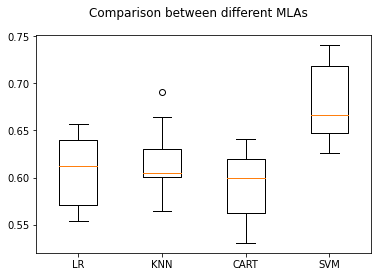

In [20]:
# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
	kfold = model_selection.KFold(n_splits=10, shuffle=True, random_state=10)
	cv_results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Comparison between different MLAs')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [21]:
# Application of all Machine Learning methods
MLA = [
    #GLM
    linear_model.LogisticRegressionCV(),
    
    #Ensemble Methods
    ensemble.RandomForestClassifier(),
    
    #SVM
    svm.SVC(probability=True),
    svm.NuSVC(probability=True),
    svm.LinearSVC(),
    
    #Trees    
    tree.DecisionTreeClassifier(),
    
    #Nearest Neighbor
    neighbors.KNeighborsClassifier(),
    ]

In [22]:
MLA_columns = []
MLA_compare = pd.DataFrame(columns = MLA_columns)

row_index = 0
for alg in MLA:  
    
    predicted = alg.fit(X_train, y_train).predict(X_test)
    fp, tp, th = roc_curve(y_test, predicted)
    MLA_name = alg.__class__.__name__
    MLA_compare.loc[row_index,'MLA used'] = MLA_name
    MLA_compare.loc[row_index, 'Train Accuracy'] = round(alg.score(X_train, y_train), 4)
    MLA_compare.loc[row_index, 'Test Accuracy'] = round(alg.score(X_test, y_test), 4)
    MLA_compare.loc[row_index, 'Precission'] = precision_score(y_test, predicted)
    MLA_compare.loc[row_index, 'Recall'] = recall_score(y_test, predicted)
    MLA_compare.loc[row_index, 'AUC'] = auc(fp, tp)

    row_index+=1
    
MLA_compare.sort_values(by = ['MLA used'], ascending = False, inplace = True)    
MLA_compare

C:\Users\ramad\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ramad\AppData\Roaming\Python\Python310\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\ramad\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,MLA used,Train Accuracy,Test Accuracy,Precission,Recall,AUC
2,SVC,0.7359,0.6860,0.702128,0.270492,0.601265
1,RandomForestClassifier,1.0000,0.6860,0.643939,0.348361,0.617141
3,NuSVC,0.8645,0.6616,0.563218,0.401639,0.608587
0,LogisticRegressionCV,0.6053,0.6280,0.000000,0.000000,0.500000
4,LinearSVC,0.6053,0.6280,0.000000,0.000000,0.500000
6,KNeighborsClassifier,0.7653,0.6311,0.505556,0.372951,0.578466
5,DecisionTreeClassifier,1.0000,0.5960,0.459144,0.483607,0.573114


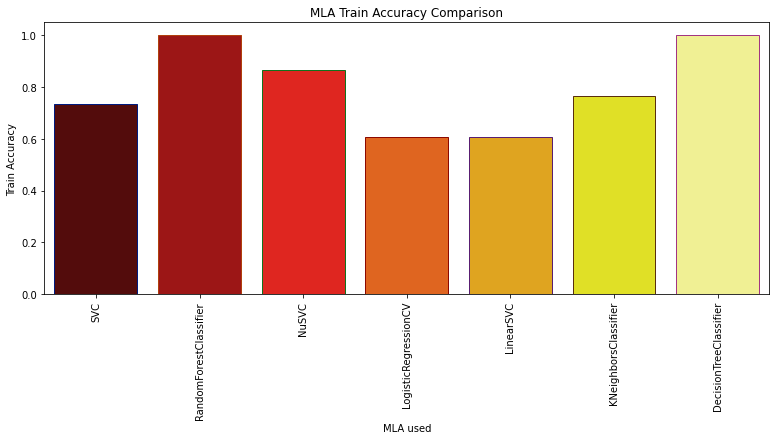

In [23]:
# Creating plot to show the train accuracy
plt.subplots(figsize=(13,5))
sns.barplot(x="MLA used", y="Train Accuracy",data=MLA_compare,palette='hot',edgecolor=sns.color_palette('dark',7))
plt.xticks(rotation=90)
plt.title('MLA Train Accuracy Comparison')
plt.show()

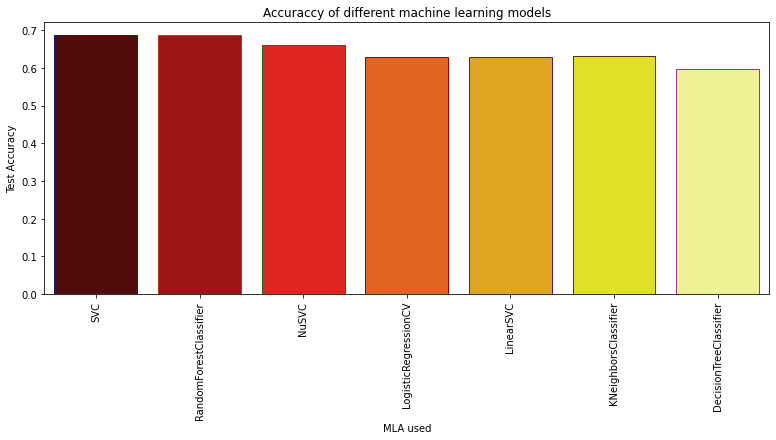

In [24]:
# Creating plot to show the test accuracy
plt.subplots(figsize=(13,5))
sns.barplot(x="MLA used", y="Test Accuracy",data=MLA_compare,palette='hot',edgecolor=sns.color_palette('dark',7))
plt.xticks(rotation=90)
plt.title('Accuraccy of different machine learning models')
plt.show()

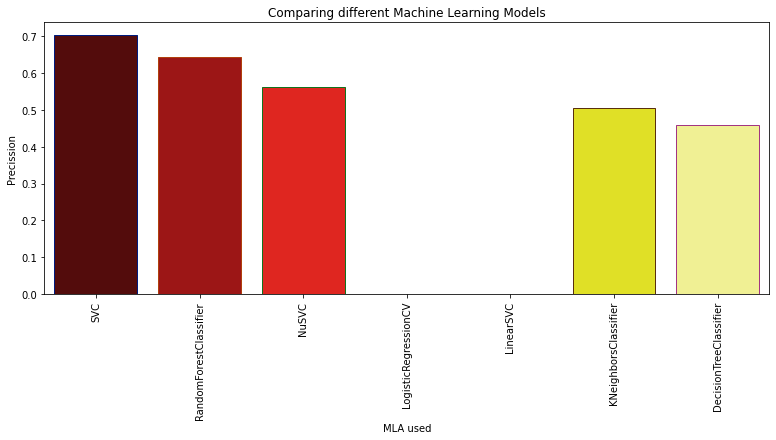

In [25]:
# Creating plots to compare precission of the MLAs
plt.subplots(figsize=(13,5))
sns.barplot(x="MLA used", y="Precission",data=MLA_compare,palette='hot',edgecolor=sns.color_palette('dark',7))
plt.xticks(rotation=90)
plt.title('Comparing different Machine Learning Models')
plt.show()

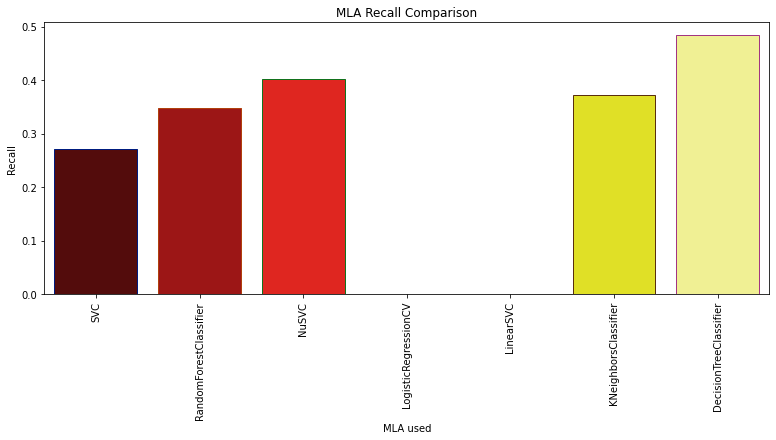

In [26]:
# Creating plots for MLA recall comparison
plt.subplots(figsize=(13,5))
sns.barplot(x="MLA used", y="Recall",data=MLA_compare,palette='hot',edgecolor=sns.color_palette('dark',7))
plt.xticks(rotation=90)
plt.title('MLA Recall Comparison')
plt.show()

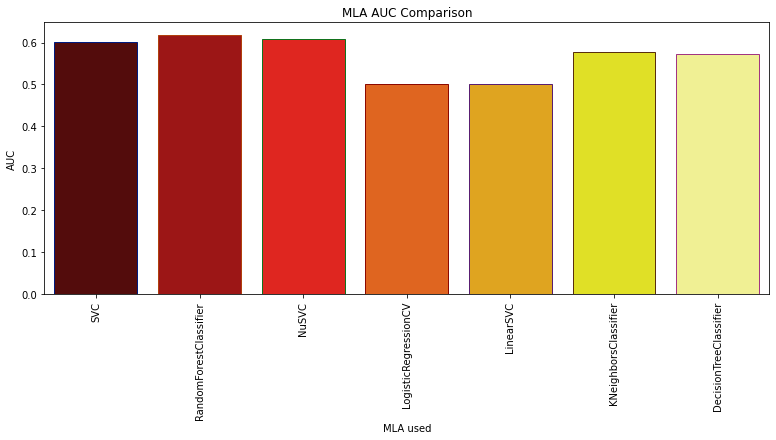

In [27]:
# Creating plot for MLA AUC comparison
plt.subplots(figsize=(13,5))
sns.barplot(x="MLA used", y="AUC",data=MLA_compare,palette='hot',edgecolor=sns.color_palette('dark',7))
plt.xticks(rotation=90)
plt.title('MLA AUC Comparison')
plt.show()

C:\Users\ramad\AppData\Roaming\Python\Python310\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


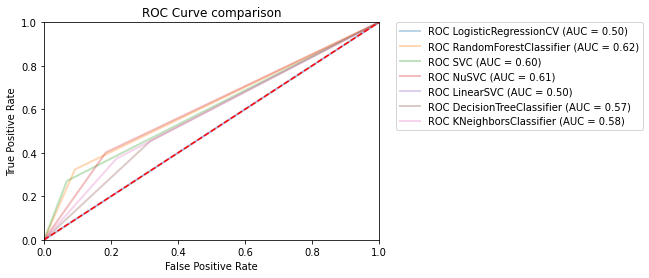

In [28]:
# Creating plot to show the ROC for all MLA
index = 1
for alg in MLA:
    
    
    predicted = alg.fit(X_train, y_train).predict(X_test)
    fp, tp, th = roc_curve(y_test, predicted)
    roc_auc_mla = auc(fp, tp)
    MLA_name = alg.__class__.__name__
    plt.plot(fp, tp, lw=2, alpha=0.3, label='ROC %s (AUC = %0.2f)'  % (MLA_name, roc_auc_mla))
   
    index+=1

plt.title('ROC Curve comparison')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.plot([0,1],[0,1],'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')    
plt.show()

Berdasarkan hasil ROC Curve Model Random Forest Classifier cenderung lebih baik dibandingkan model lainnya